<a href="https://colab.research.google.com/github/Sara1Mohsen/YOLOv5/blob/main/objectDetection%20_using_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install tensorflow
#!pip install tensorboard
!pip install torch
!pip install numpy
import torch
from IPython.display import Image
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib
!pip install -r requirements.txt

%cd /content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 63.6 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.84.0
    Uninstalling google-api-python-client-2.84.0:
      Successfully uninstalled google-api-python-client-2.84.0
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd /content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5


In [ ]:
!pip install -r requirements.txt

%cd /content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5


divide the dataset into train and validation

In [ ]:
from pickle import APPEND
from os.path import join, isfile
import os ,sys
from os import listdir
from random import choice
import shutil

#store file name in arrays
imgs=[]
xmls=[]

trainPath = "/content/drive/MyDrive/BURN/Skin_Burn_Detection/data_set/images/train"
valPath = "/content/drive/MyDrive/BURN/Skin_Burn_Detection/data_set/images/val"
#!git clone https://github.com/Sara1Mohsen/Sara1Mohsen.git
crsPath = "//content/drive/MyDrive/BURN/Skin_Burn_Detection/Data0"
#crsPath = r"C:\Users\User\OneDrive\Documents\GitHub\Skin_Burn_Detection\Data0"

# #setup ratio for train and val
train_ratio = 0.8
val_ratio = 0.2

totalImgCount = len(os.listdir(crsPath))/2



for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)



countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

training images are :  258
Validation images are :  64


In [ ]:
trainigmagePath = "/content/drive/MyDrive/BURN/Skin_Burn_Detection/data_set/images/train"
trainglabelPath = "/content/drive/MyDrive/BURN/Skin_Burn_Detection/data_set/labels/train"
valimagePath = "/content/drive/MyDrive/BURN/Skin_Burn_Detection/data_set/images/val"
vallbelPath = "/content/drive/MyDrive/BURN/Skin_Burn_Detection/data_set/labels/val"

for x in range(countForTrain):

    fileJpg = choice(imgs)
    fileXml = fileJpg[:-4] +'.txt'

    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainigmagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainglabelPath, fileXml))

    imgs.remove(fileJpg)
    xmls.remove(fileXml)



for x in range (countForVal):

  fileJpg = choice(imgs)
  fileXml = fileJpg[:-4] +'.txt'


  shutil.copy(os.path.join(crsPath,fileJpg), os.path.join(valimagePath,fileJpg))
  shutil.copy(os.path.join(crsPath,fileXml), os.path.join(vallbelPath,fileXml))


  imgs.remove(fileJpg)
  xmls.remove(fileXml)

shutil.move(crsPath,valPath)


In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-03-15 17:39:49.939187: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 17:39:51.703057: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-15 17:39:51.703189: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/

In [ ]:
!python train.py --img 415 --batch 16 --epochs 30 --data yaml-validator.yaml --weights yolov5m.pt --cache

2023-07-04 08:02:30.484224: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 08:02:32.875125: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5m.pt, cfg=, data=yaml-validator.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_inter

In [ ]:
!python detect.py --source /content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/runs/train/exp/Test_imag.webp  --weights /content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/runs/train/exp/weights/best.pt

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
python3: can't open file 'detect.py': [Errno 107] Transport endpoint is not connected


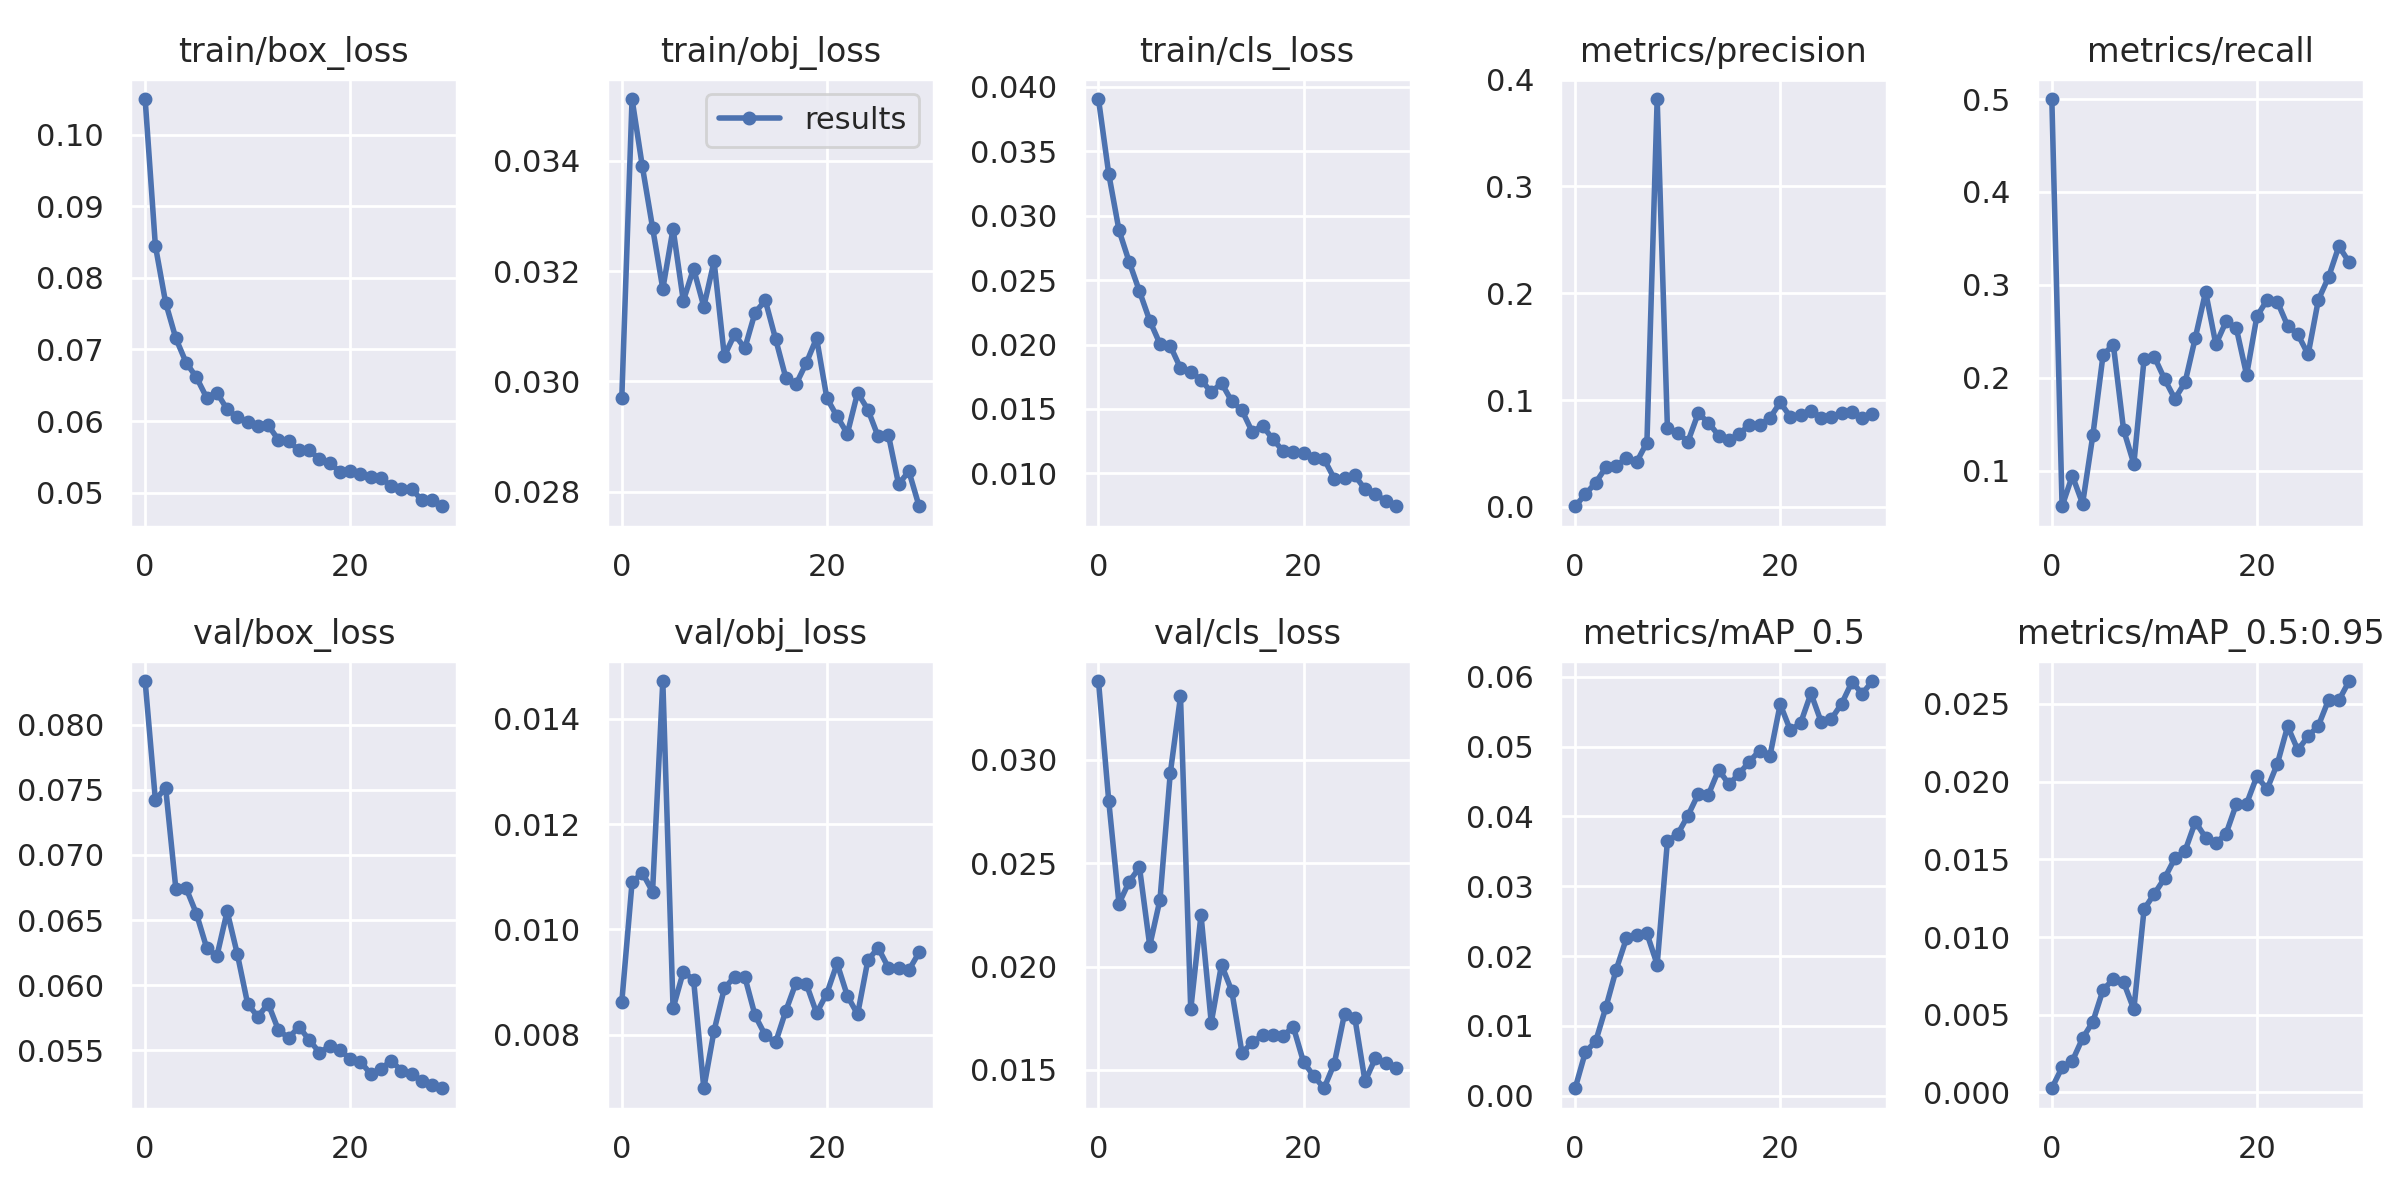

In [ ]:
from PIL import Image
from utils.plots import plot_results
# Image.open(filename='/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/runs/train/exp/results.png', width=1000)
filename='/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/runs/train/exp/results.png'
Image.open(filename)

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/runs/train/exp/weights/best.pt')

In [ ]:
#  from tensorflow.keras.models  import load_model
# from tensorflow import keras
# model = keras.models.load_model('/content/drive/MyDrive/BURN/Saved_model /.hdf5')

In [ ]:
!python detect.py --source /content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/runs/train/exp/Test_Image.jpg  --weights /content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/runs/train/exp/weights/best.pt --save-conf

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
python3: can't open file 'detect.py': [Errno 107] Transport endpoint is not connected


In [ ]:
import torch
model = torch.hub.load('/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5', 'custom', path=r'/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/runs/train/exp/weights/best.pt', source='local')

YOLOv5 🚀 v7.0-117-g85f6019 Python-3.9.16 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
torch.save(model, '/content/drive/MyDrive/BURN/my_model.h5')

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd /content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15996, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 15996 (delta 101), reused 111 (delta 69), pack-reused 15831
Receiving objects: 100% (15996/15996), 14.64 MiB | 21.91 MiB/s, done.
Resolving deltas: 100% (10974/10974), done.
/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5


In [ ]:
import flask
import torch
import io
from tensorflow.python.keras.models import load_model
from yolov5 import detect
from PIL import Image
from flask import current_app, flash, jsonify, make_response, redirect, request, url_for
import base64



app = flask.Flask(__name__)
model = torch.hub.load('/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5', 'custom', path=r'/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/runs/train/exp/weights/best.pt', source='local')
# model_path = ('/content/drive/MyDrive/BURN/my_model.h5')


@app.route('/detect', methods=['POST'])
def run_model():
    data = request.json
    image_data = base64.b64decode(data['image_data'])
    image = Image.open(io.BytesIO(image_data))


    results = detect(image, model=model)


    return jsonify(results)

if __name__ == '__main__':
    # load_model('/content/drive/MyDrive/BURN/my_model.h5')
    app.run(host='localhost', port=5000,debug=True)


YOLOv5 🚀 v7.0-117-g85f6019 Python-3.9.16 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients
Adding AutoShape... 


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://localhost:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
import tensorflow as tf

!pip install tensorflow==2.5.0

!pip install tensorflow-hub
!pip install tensorflow-text
!pip install tflite-support


In [ ]:
!pip install tensorflow
!pip install tensorflow-object-detection-api

In [ ]:
!python models/tf.py --weights /content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/runs/train/exp/weights/best.pt --cfg /content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/yolov5/models/yolov5s.yaml --output /content/drive/MyDrive/BURN/tflite

python3: can't open file '/content/models/tf.py': [Errno 2] No such file or directory


In [ ]:
!python export.py --weights /content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/yolov5s.pt --include saved_model pb tflite [--int8] --img 640
!python export.py --weights /content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/yolov5s.pt --include tfjs --img 640

export: data=data/coco128.yaml, weights=['/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/yolov5s.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['saved_model', 'pb', 'tflite', '[--int8]']
Traceback (most recent call last):
  File "/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/export.py", line 672, in <module>
    main(opt)
  File "/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/export.py", line 667, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/export.py", line 538, in run
    assert sum(flags) == len(include), f'ERROR: Invalid --include {inclu

In [ ]:
!python export.py --weights /content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/runs/train/exp/weights/best.pt --include tflite --img 416

export: data=data/coco128.yaml, weights=['/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/runs/train/exp/weights/best.pt'], imgsz=[416], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-117-g85f6019 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients

PyTorch: starting from /content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/runs/train/exp/weights/best.pt with output shape (1, 10647, 8) (13.6 MB)
2023-06-23 21:55:28.607423: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with th

In [ ]:
!python detect.py --weights /content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/runs/train/exp/weights/best-fp16.tflite --img 416 --conf 0.25 --source /content/drive/MyDrive/BURN/shutterstock_245937664-scaled.jpg

detect: weights=['/content/drive/MyDrive/BURN/Skin_Burn_Detection/yolov5/runs/train/exp/weights/best-fp16.tflite'], source=/content/drive/MyDrive/BURN/shutterstock_245937664-scaled.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-117-g85f6019 Python-3.10.12 torch-2.0.1+cu118 CPU

2023-06-23 22:09:52.886067: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 22:09:54.781773: W tensorflow/c

In [ ]:
# import tensorflow as tf
# model_file = "my_model.h5"
# # convert_tflite.py
# converter = tf.lite.TFLiteConverter.from_keras_model(model_file)
# tflite_model = converter.convert()
# open("my_model.tflite", "wb").write(tflite_model)


In [ ]:
# # import sqlite3 as lite
# import tensorflow as tf
# converter = tf.lite.TocoConverter.from_keras_model_file(model)
# tflite = converter.convert()
# open("linear.tflite","wb").write(tflite)

In [ ]:
# !pip install google_colab_shell
# from google_colab_shell import getshell
# getshell()